In [25]:
import math
import statistics
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import scipy.stats as stats # type: ignore
from scipy.stats import norm # type: ignore
from matplotlib.patches import Rectangle # type: ignore
from math import cos, sin

In [26]:
data = "Session_28_06_2024_HR11_MIN12_SEC29.csv"
cls = ["TrackingStamp", "TimeStamp", "X", "Y", "Angle", "PosterNumber", "TrialStamp"]
df = pd.read_csv(data, skiprows=53, names=cls)
stamp, time, x, y, yaw = np.loadtxt("BOUNDARIES.txt", skiprows=47, unpack = True)

# Create tuples with information of each poster 
posters = [
    (1, -12.27, -1.87, "Cat"), 
    (2, -2.77, 12.26, "Hippo"), 
    (3, 2.23, -1.87, "Fox"), 
    (4, 2.23, 7.63, "Rabbit"), 
    (5, -12.27, 17.13, "Crocodile"), 
    (6, -12.27, 7.63, "Pig")
    ]

x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)
dfs = []
index = df.index[df['TrialStamp'] == 1].tolist() 
index = [0] + index + [len(df)]
for i in range(len(index) - 1):
    starting_index = index[i]
    ending_index = index[i+1]
    new_df = df.iloc[starting_index:ending_index]
    dfs.append(new_df)
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}:\n{df}\n")
if dfs:
    dfs.pop(0)


DataFrame 1:
    TrackingStamp  TimeStamp     X    Y  Angle  PosterNumber  TrialStamp
0               0   0.016831 -7.07 -4.8    0.0             0           0
1               0   0.020000 -7.07 -4.8    0.0             0           0
2               0   0.016552 -7.07 -4.8    0.0             0           0
3               0   0.016490 -7.07 -4.8    0.0             0           0
4               0   0.016611 -7.07 -4.8    0.0             0           0
5               0   0.016790 -7.07 -4.8    0.0             0           0
6               0   0.019277 -7.07 -4.8    0.0             0           0
7               0   0.014024 -7.07 -4.8    0.0             0           0
8               0   0.016700 -7.07 -4.8    0.0             0           0
9               0   0.016728 -7.07 -4.8    0.0             0           0
10              0   0.016669 -7.07 -4.8    0.0             0           0
11              0   0.016702 -7.07 -4.8    0.0             0           0
12              0   0.016712 -7.07 -4.

In [27]:
n_plots = len(dfs)
n_cols = 6
n_rows = math.ceil(n_plots/n_cols)
poster_animal = ""
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 8))
axes = axes.flatten()

for i, (df, ax) in enumerate(zip(dfs, axes)):
    poster_number = df.loc[df['TrialStamp'] == 1, 'PosterNumber'].values[0] if not df.loc[df['TrialStamp'] == 1, 'PosterNumber'].empty else 'Unknown'
    if (poster_number == 1):
        poster_animal = "Cat"
    elif (poster_number == 2):
        poster_animal = "Hippo"
    elif (poster_number == 3):
        poster_animal = "Fox"
    elif (poster_number == 4):
        poster_animal = "Rabbit"
    elif (poster_number == 5):
        poster_animal = "Crocodile"
    elif (poster_number == 6):
        poster_animal = "Pig"
        
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.scatter(df[sorted("X")], df[sorted("Y")], marker = '.')
    ax.set_title(f'Trial {i + 1} (Poster {poster_animal})')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [28]:
dfs1 = []
dfs2 = []
dfs3 = []
dfs4 = []
dfs5 = []
dfs6 = []
for df in dfs:
    select_poster_number = df.loc[df['TrialStamp'] == 1, 'PosterNumber'].values[0] if not df.loc[df['TrialStamp'] == 1, 'PosterNumber'].empty else 'Unknown'
    if (select_poster_number == 1):
        dfs1.append(df)
    elif (select_poster_number == 2):
        dfs2.append(df)
    elif (select_poster_number == 3):
        dfs3.append(df)
    elif (select_poster_number == 4):
        dfs4.append(df)
    elif (select_poster_number == 5):
        dfs5.append(df)
    elif (select_poster_number == 6):
        dfs6.append(df)
dfs_lists = [dfs1, dfs2, dfs3, dfs4, dfs5, dfs6]

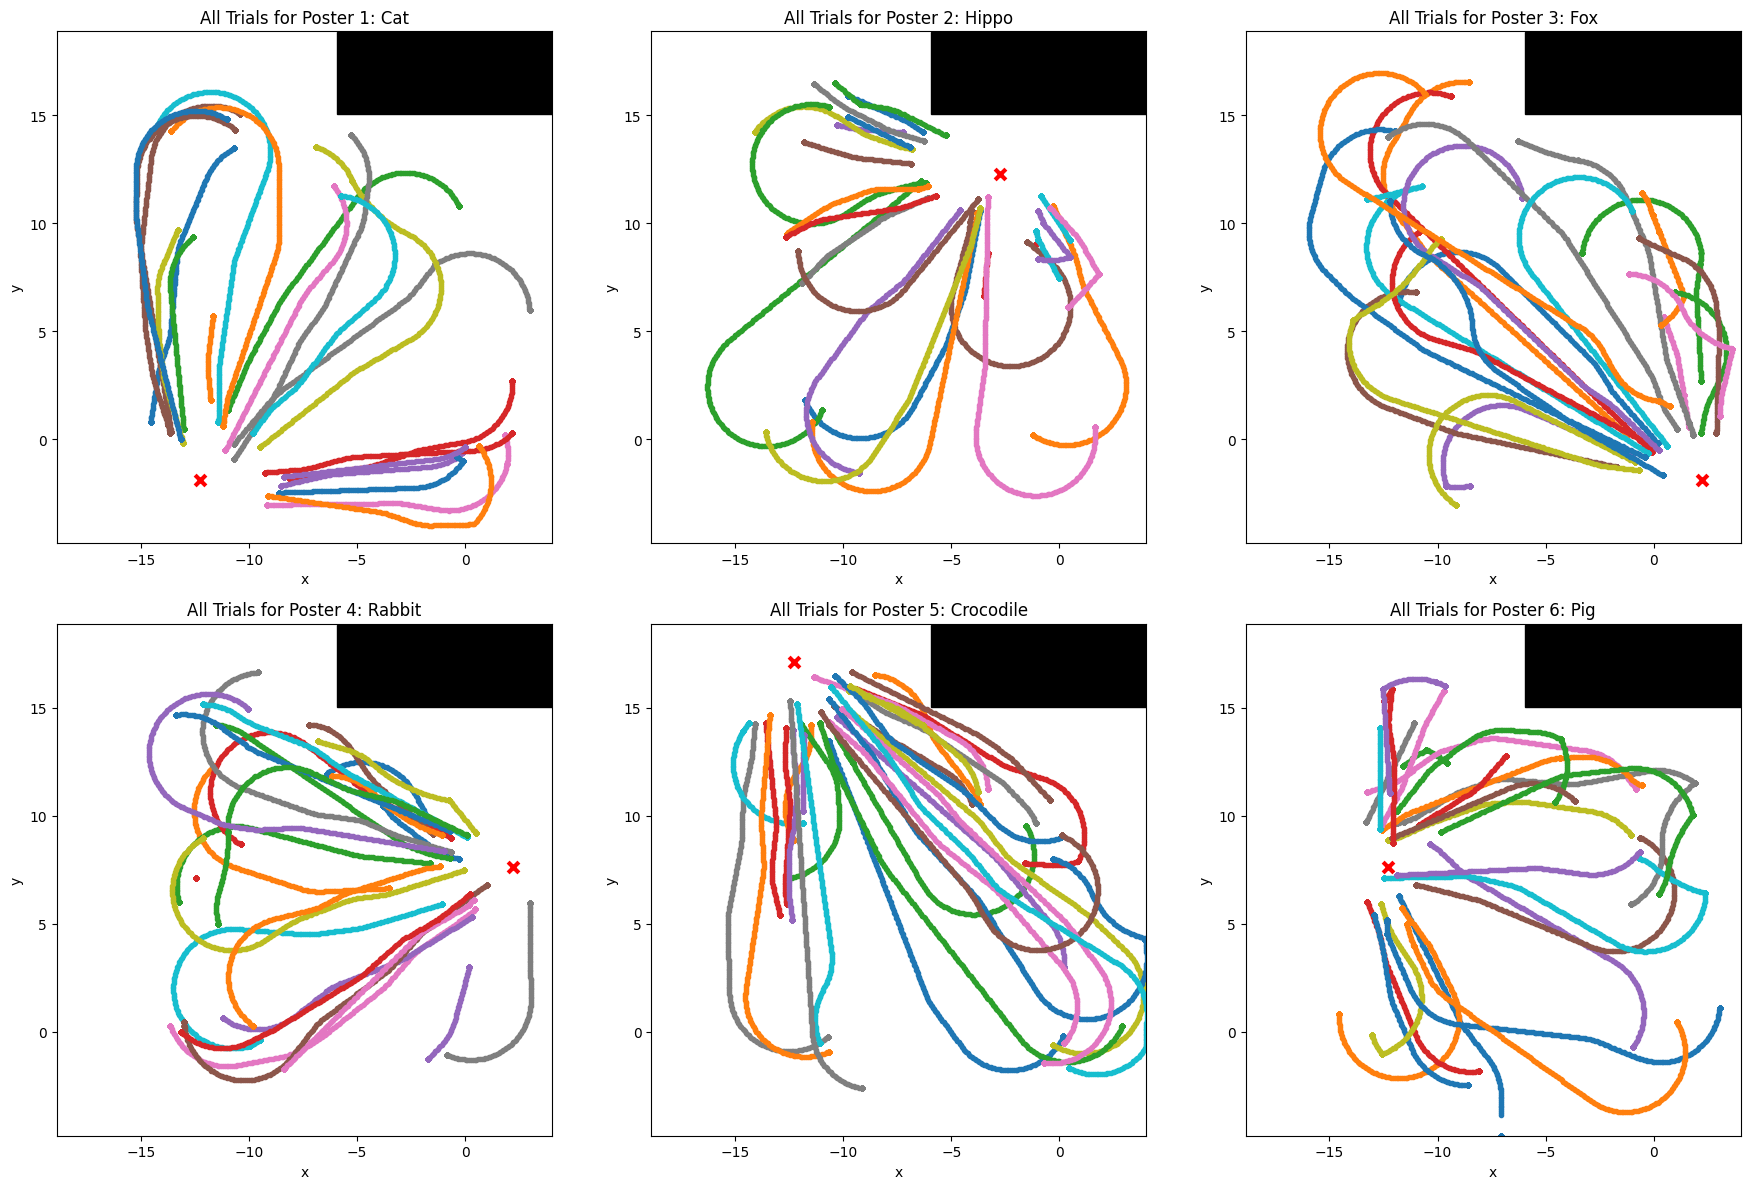

In [29]:
def plot_all(ax, dfs, tuple):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]

    for i, df in enumerate(dfs):
        ax.scatter(df['X'], df['Y'], marker = '.', label = f'Trial {i + 1}')
   
    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    
    ax.scatter(target_x, target_y, color='red', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster in zip(axes, dfs_lists, posters):
    plot_all(ax, dfs_list, poster)

plt.tight_layout()
plt.show()
#add green or red dot for correct 

In [30]:
x_values_sets = []
y_values_sets = []
angles_values_sets = []

for dfs_set in dfs_lists:
    x_values = []
    y_values = []
    angles = []
    for df in dfs_set: 
        filtered_df = df.loc[(df['TrialStamp'] == 3) | (df['TrialStamp'] == 4)]

        if not filtered_df.empty: 
            x_values.extend(filtered_df['X'].tolist())
            y_values.extend(filtered_df['Y'].tolist())
            angles.extend(filtered_df['Angle'].tolist())
    x_values_sets.append(x_values)
    y_values_sets.append(y_values)
    angles_values_sets.append(angles)

In [31]:
euclidean_distances = []
# add x and y data separately (add variance stats of each axis)
def euclidean_distance_error(x_values, y_values, tuple):
    target_x, target_y = tuple[1], tuple[2]
    errors = []
    
    for x, y in zip(x_values, y_values):
        euclidean_error = math.sqrt((target_x - x) ** 2 + (target_y - y) ** 2)
        errors.append(euclidean_error)
    euclidean_distance = sum(errors) / len(errors)
    return euclidean_distance

for x_values, y_values, poster in zip(x_values_sets, y_values_sets, posters):
    distance = round(euclidean_distance_error(x_values, y_values, poster),5)
    euclidean_distances.append(distance)

for i, distance in enumerate(euclidean_distances):
    print(f"Euclidean distance for {posters[i][3]}: {distance}")

Euclidean distance for Cat: 2.9662
Euclidean distance for Hippo: 3.04822
Euclidean distance for Fox: 3.37701
Euclidean distance for Rabbit: 3.60314
Euclidean distance for Crocodile: 2.96114
Euclidean distance for Pig: 2.1069


In [32]:
mean_absolute_errors = []

def mean_absolute_error(x_values, y_values, tuple):
    target_x, target_y = tuple[1], tuple[2]
    abs_errors = []
    
    for x, y in zip(x_values, y_values):
        absolute_error = abs(target_x - x) + abs(target_y - y)
        abs_errors.append(absolute_error)
    mean_absolute_error = sum(abs_errors) / len(abs_errors)
    return mean_absolute_error

for x_values, y_values, poster in zip(x_values_sets, y_values_sets, posters):
    absolute = round(mean_absolute_error(x_values, y_values, poster),5)
    mean_absolute_errors.append(absolute) 
    
for i, absolute in enumerate(mean_absolute_errors):
    print(f"Mean Absolute Error for {posters[i][3]}: {absolute}")

Mean Absolute Error for Cat: 3.69813
Mean Absolute Error for Hippo: 3.92579
Mean Absolute Error for Fox: 4.19221
Mean Absolute Error for Rabbit: 4.44552
Mean Absolute Error for Crocodile: 3.81969
Mean Absolute Error for Pig: 2.56395


In [33]:
root_mean_square_errors = []

def root_mean_square_error(x_values, y_values, tuple):
    target_x, target_y = tuple[1], tuple[2]
    rmse_errors = []
    
    for x, y in zip(x_values, y_values):
        root_mean_square_error = (target_x - x) ** 2 + (target_y - y) ** 2
        rmse_errors.append(root_mean_square_error)
    rmse_error = math.sqrt(sum(rmse_errors) / len(rmse_errors))
    return rmse_error

for x_values, y_values, poster in zip(x_values_sets, y_values_sets, posters):
    rmse_error = round(root_mean_square_error(x_values, y_values, poster),5)
    root_mean_square_errors.append(rmse_error) 
    
for i, rmse_error in enumerate(root_mean_square_errors):
    print(f"Root Mean Square Error for {posters[i][3]}: {rmse_error}")

Root Mean Square Error for Cat: 3.0464
Root Mean Square Error for Hippo: 3.18736
Root Mean Square Error for Fox: 4.09986
Root Mean Square Error for Rabbit: 4.3602
Root Mean Square Error for Crocodile: 3.05414
Root Mean Square Error for Pig: 2.29658


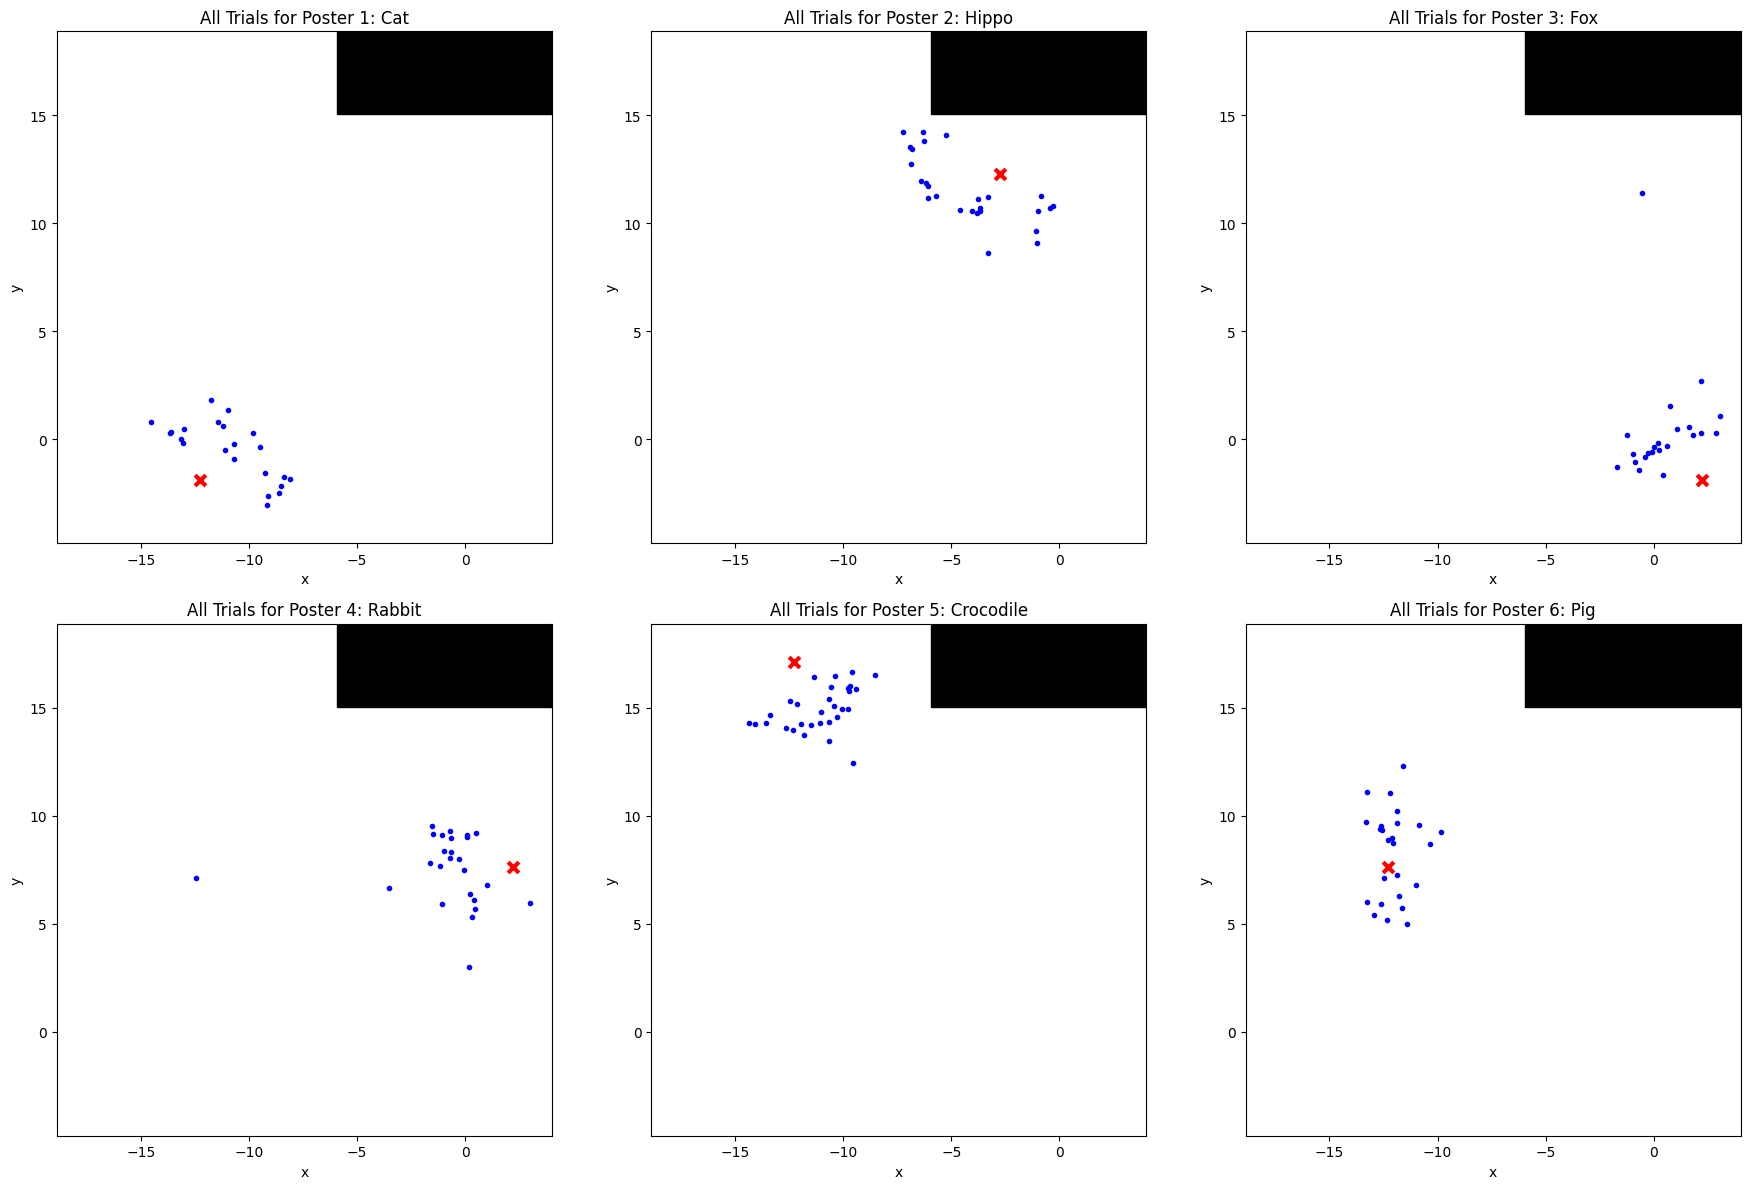

In [34]:
def plot_all(ax, dfs, tuple, x_values, y_values):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    
    for x, y in zip(x_values, y_values):
        ax.scatter(x, y, marker = '.', color='blue')

    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    
    ax.scatter(target_x, target_y, color='red', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')


fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster, x_values, y_values in zip(axes, dfs_lists, posters, x_values_sets, y_values_sets):
    plot_all(ax, dfs_list, poster, x_values, y_values)

plt.tight_layout()
plt.show()

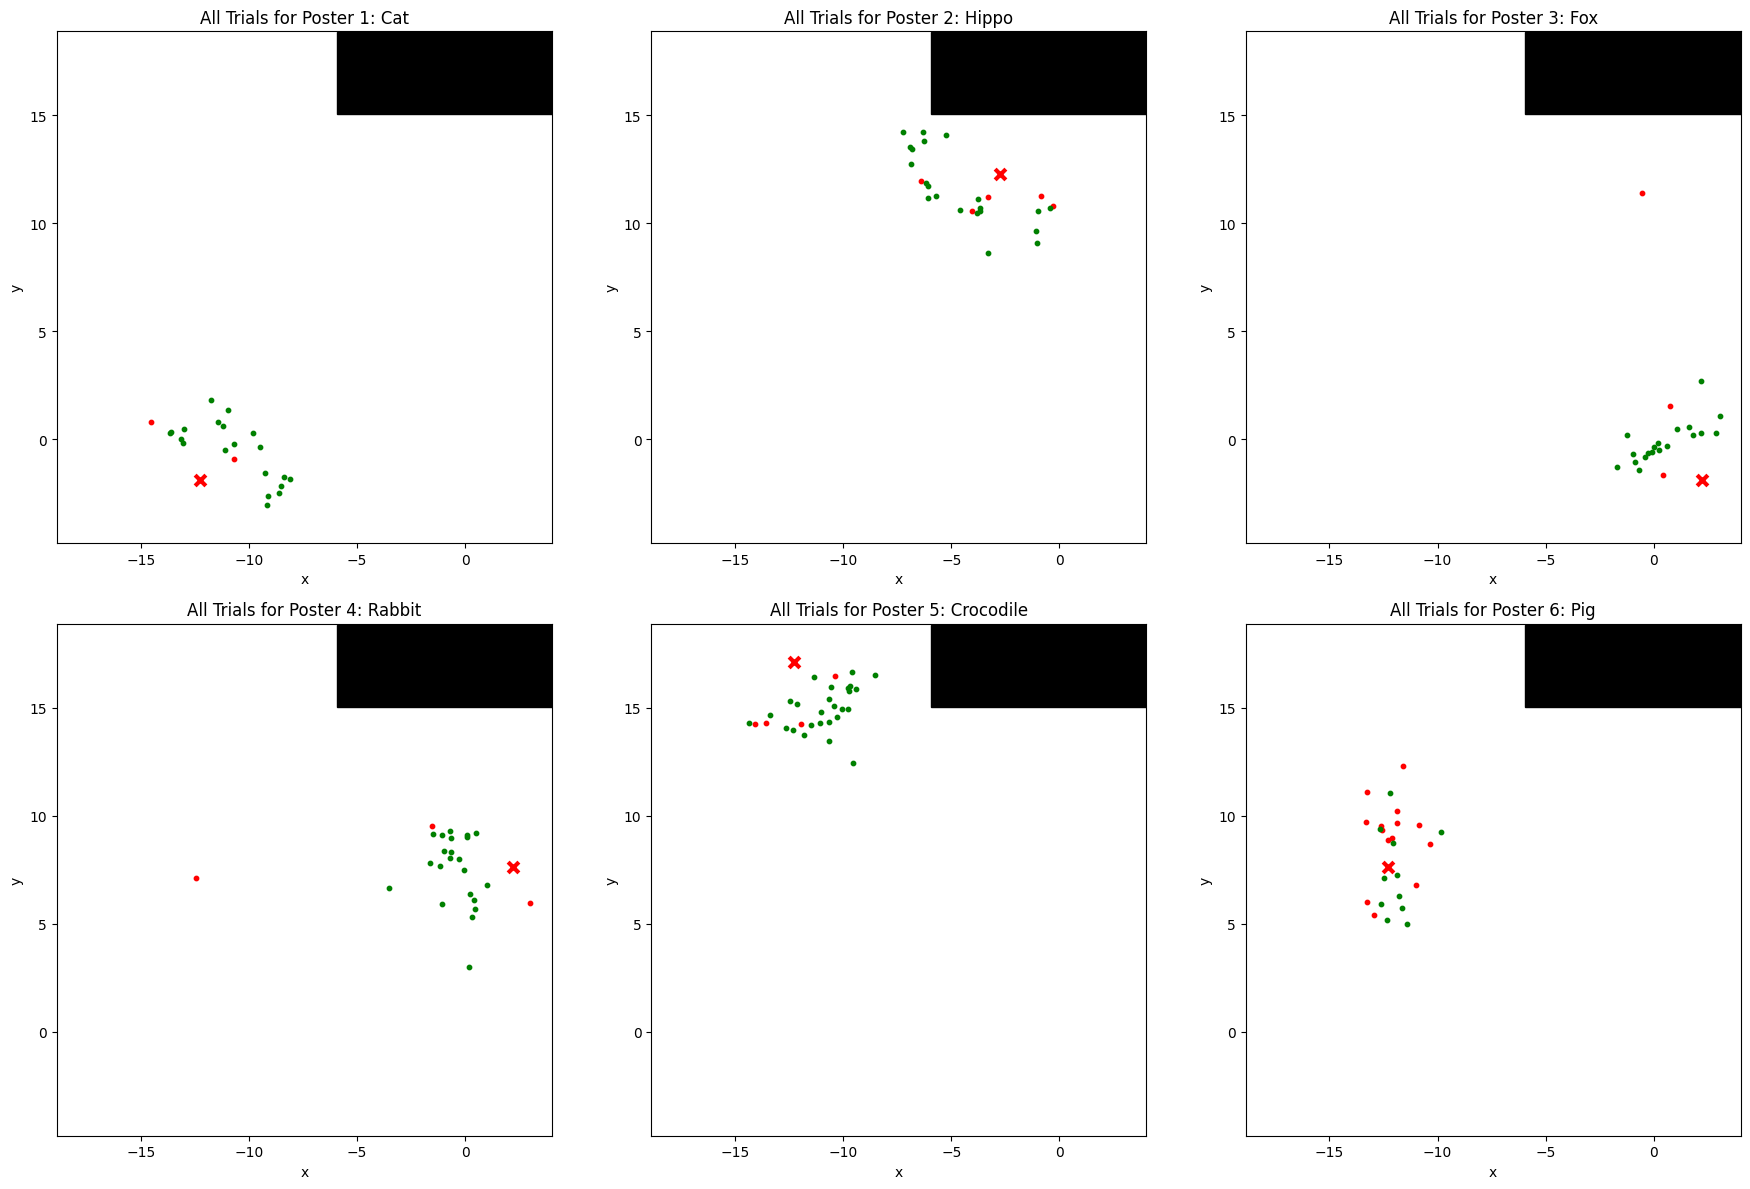

In [35]:
def plot_all(ax, dfs, tuple, x_values, y_values):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    
    for df, x, y in zip(dfs, x_values, y_values):
        if 4 in df['TrialStamp'].values:
            ax.scatter(x, y, marker='.', color='red', s=40)
        else:
            ax.scatter(x, y, marker='.', color='green', s=40)

    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    
    ax.scatter(target_x, target_y, color='red', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster, x_values, y_values in zip(axes, dfs_lists, posters, x_values_sets, y_values_sets):
    plot_all(ax, dfs_list, poster, x_values, y_values)

plt.tight_layout()
plt.show()

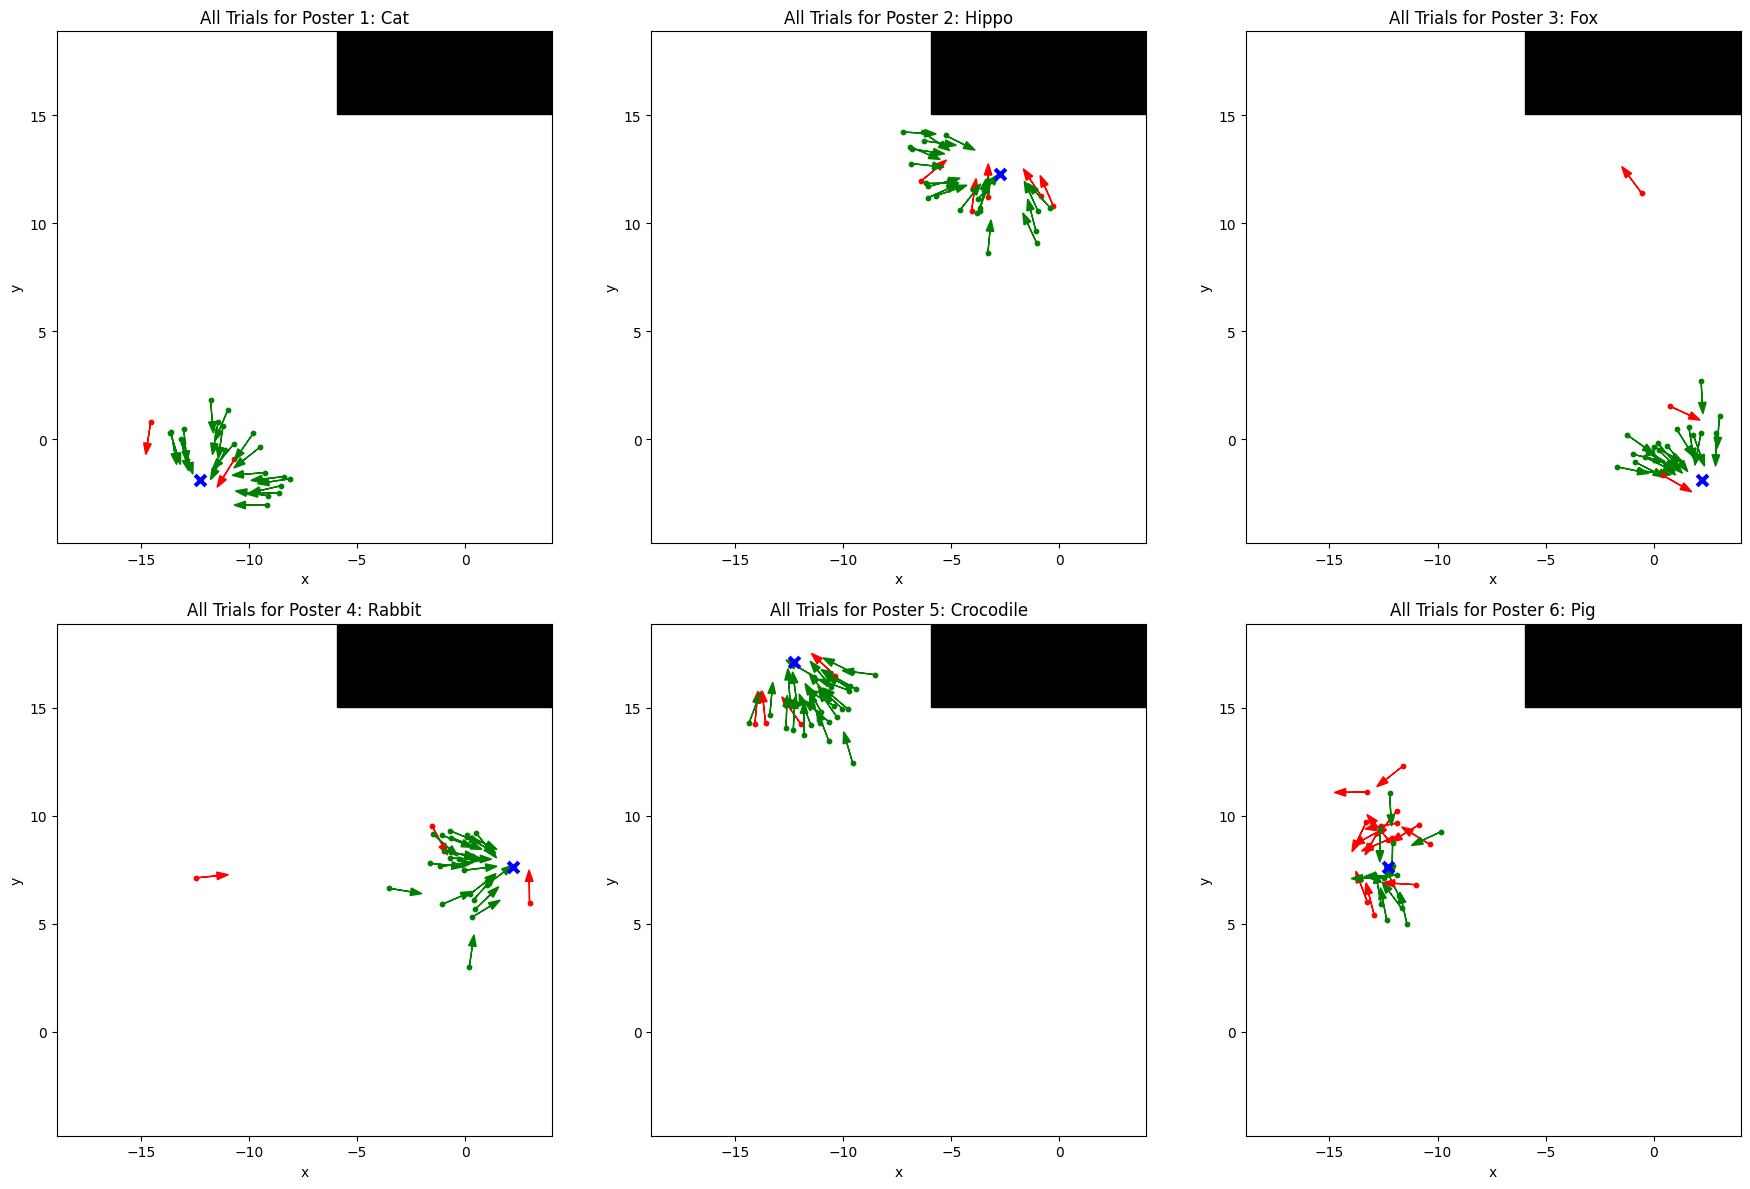

In [36]:
def plot_all(ax, dfs, tuple, x_values, y_values, angles):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    
    for df, x, y, angle in zip(dfs, x_values, y_values, angles):
        if 4 in df['TrialStamp'].values:
            ax.scatter(x, y, marker='.', color='red', s=40)  
            angle_rad = np.deg2rad(angle)
            ax.arrow(x, y, sin(angle_rad), cos(angle_rad), color='red', head_width=0.35)
        else:
            ax.scatter(x, y, marker='.', color='green', s=40)
            angle_rad = np.deg2rad(angle)
            ax.arrow(x, y, sin(angle_rad), cos(angle_rad), color='green', head_width=0.35)

    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))

    ax.scatter(target_x, target_y, color='blue', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster, x_values, y_values, angles in zip(axes, dfs_lists, posters, x_values_sets, y_values_sets, angles_values_sets):
    plot_all(ax, dfs_list, poster, x_values, y_values, angles)

plt.tight_layout()
plt.show()

Some things to be noted: 

Every now and then after you get a poster wrong, the sim would rotate your character as if you were in the death scene while you are controlling your character. This can be seen in some of the graphs at the very top, where there is a random curved path towards the wall instead of towards a poster. Specifically trials 127 and 136. 

In Poster 3 and 4, there are two dots that look as if they were going to other posters. This is because of the fact that in some instances, the poster would disappear from the top, which could be significant in data collection if it happens to the monkey. 

There look to be come inconsistencies with what is tracked as a success or failure. Specifically with fox, one of the closest points is red due to the angle being slightly off. 

In [37]:
def basic_x_stats(dfs, tuple, x_vals): # Replicates 1-var stats on a Ti-84
    poster_num, target_x, animal = tuple[0], tuple[1], tuple[3]
    x_diffs = []

    for x in x_vals:
        x_diff = round((x - target_x),5)
        x_diffs.append(x_diff)
    mean_x = round(statistics.mean(x_diffs),5)

    x_sum_squares = []
    for x_diff in x_diffs:
        x_square_diff = (x_diff - mean_x) ** 2
        x_sum_squares.append(x_square_diff)

    sum_x = round(sum(x_diffs),5)
    x_sum_of_squares = round(sum(x_sum_squares),5)
    std_x, variance_x, pop_std_x = round(statistics.stdev(x_diffs),5), round(statistics.variance(x_diffs),5), round(statistics.pstdev(x_diffs),5)
    quantiles_x = statistics.quantiles(x_diffs, n=4), 
    print(f'Mean of x for Poster {poster_num}: {animal}:', mean_x)
    print(f'Sum of x for Poster {poster_num}: {animal}:', sum_x)
    print(f'Sum of squares of x for Poster {poster_num}: {animal}:', x_sum_of_squares)
    print(f'Standard deviation of x for Poster {poster_num}: {animal}:', std_x)
    print(f'Variance of x for Poster {poster_num}: {animal}:', variance_x)
    print(f'Population standard deviation of x for Poster {poster_num}: {animal}:', pop_std_x)
    print(f'Quartiles of x for Poster {poster_num}: {animal}:', quantiles_x)

    print()
    
def basic_y_stats(dfs, tuple, y_vals): # Replicates 1-var stats on a Ti-84
    poster_num, target_y, animal = tuple[0], tuple[2], tuple[3]
    y_diffs = []

    for y in y_vals:
        y_diff = round((y - target_y),5)
        y_diffs.append(y_diff)
    mean_y = round(statistics.mean(y_diffs),5)

    y_sum_squares = []
    for y_diff in y_diffs:
        y_square_diff = (y_diff - mean_y) ** 2
        y_sum_squares.append(y_square_diff)

    sum_y = round(sum(y_diffs),5)
    y_sum_of_squares = round(sum(y_sum_squares),5)
    std_y, variance_y, pop_std_y = round(statistics.stdev(y_diffs),5), round(statistics.variance(y_diffs),5), round(statistics.pstdev(y_diffs),5)
    # n_y, min_y, max_y = len(y_diffs), min(y_diffs), max(y_diffs)
    quantiles_y = statistics.quantiles(y_diffs, n=4), 

    print(f'Mean of y for Poster {poster_num}: {animal}:', mean_y)
    print(f'Sum of y for Poster {poster_num}: {animal}:', sum_y)
    print(f'Sum of squares of y for Poster {poster_num}: {animal}:', y_sum_of_squares)
    print(f'Standard deviation of y for Poster {poster_num}: {animal}:', std_y)
    print(f'Variance of y for Poster {poster_num}: {animal}:', variance_y)
    print(f'Population standard deviation of y for Poster {poster_num}: {animal}:', pop_std_y)
    print(f'Quartiles of y for Poster {poster_num}: {animal}:', quantiles_y)
    print()
for dfs_list, poster, x_values in zip(dfs_lists, posters, x_values_sets):
    basic_x_stats(dfs_list, poster, x_values)
print()
for dfs_list, poster, y_values in zip(dfs_lists, posters, y_values_sets):
    basic_y_stats(dfs_list, poster, y_values)

Mean of x for Poster 1: Cat: 1.39547
Sum of x for Poster 1: Cat: 30.7004
Sum of squares of x for Poster 1: Cat: 80.56199
Standard deviation of x for Poster 1: Cat: 1.95864
Variance of x for Poster 1: Cat: 3.83629
Population standard deviation of x for Poster 1: Cat: 1.91361
Quartiles of x for Poster 1: Cat: ([-0.749475, 1.42325, 3.1229499999999994],)

Mean of x for Poster 2: Hippo: -1.49709
Sum of x for Poster 2: Hippo: -38.9243
Sum of squares of x for Poster 2: Hippo: 131.65714
Standard deviation of x for Poster 2: Hippo: 2.29484
Variance of x for Poster 2: Hippo: 5.26629
Population standard deviation of x for Poster 2: Hippo: 2.25027
Quartiles of x for Poster 2: Hippo: ([-3.5191, -1.55585, 0.01745000000000002],)

Mean of x for Poster 3: Fox: -1.76028
Sum of x for Poster 3: Fox: -38.7261
Sum of squares of x for Poster 3: Fox: 37.97341
Standard deviation of x for Poster 3: Fox: 1.34471
Variance of x for Poster 3: Fox: 1.80826
Population standard deviation of x for Poster 3: Fox: 1.3138

In [38]:
def cord_stats(dfs, tuple, x_vals, y_vals): 
    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    displacements = [] 
    for x, y, in zip(x_vals, y_vals):
        dx = target_x - x
        dy = target_y - y 
        displacement = round((dx**2 + dy**2) ** 0.5,5)
        displacements.append(displacement)
    mean = round(statistics.mean(displacements),5)
    std, variance, pop_std = round(statistics.stdev(displacements),5), round(statistics.variance(displacements),5), round(statistics.pstdev(displacements),5)
    quartiles = statistics.quantiles(displacements, n=4), 

    print(f'Mean of displacements for Poster {poster_num}: {animal}:', mean)
    print(f'Standard deviation of displacements for Poster {poster_num}: {animal}:', std)
    print(f'Variance of displacements for Poster {poster_num}: {animal}:', variance)
    print(f'Population standard deviation of displacements for Poster {poster_num}: {animal}:', pop_std)
    print(f'Quartiles of displacements for Poster {poster_num}: {animal}:', quartiles)
    print()
for dfs_list, poster, x_values, y_values in zip(dfs_lists, posters, x_values_sets, y_values_sets):
    cord_stats(dfs_list, poster, x_values, y_values)

Mean of displacements for Poster 1: Cat: 2.9662
Standard deviation of displacements for Poster 1: Cat: 0.71075
Variance of displacements for Poster 1: Cat: 0.50517
Population standard deviation of displacements for Poster 1: Cat: 0.69441
Quartiles of displacements for Poster 1: Cat: ([2.4029825000000002, 3.08793, 3.5642375],)

Mean of displacements for Poster 2: Hippo: 3.04822
Standard deviation of displacements for Poster 2: Hippo: 0.9499
Variance of displacements for Poster 2: Hippo: 0.90231
Population standard deviation of displacements for Poster 2: Hippo: 0.93145
Quartiles of displacements for Poster 2: Hippo: ([2.1723149999999998, 3.108395, 3.70557],)

Mean of displacements for Poster 3: Fox: 3.37701
Standard deviation of displacements for Poster 3: Fox: 2.3795
Variance of displacements for Poster 3: Fox: 5.66201
Population standard deviation of displacements for Poster 3: Fox: 2.32479
Quartiles of displacements for Poster 3: Fox: ([2.3796625000000002, 2.7548399999999997, 3.46949

In [42]:
def angle_diff(theta1, theta2):
    theta = abs(theta1 - theta2) % 360
    return min(theta, 360 - theta)

def angle_error(tuple, x_vals, y_vals, angles):
    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    angles_errors = []
    for x, y, angle in zip(x_vals, y_vals, angles):
        
        dx = target_x - x
        dy = target_y - y 
        
        angle_calc = np.arctan2(dx, dy)
        angle_deg = np.degrees(angle_calc)
        angle_deg = (angle_deg + 360) % 360

        angle_difference = np.radians(angle_diff(angle_deg, angle))
        angles_errors.append(angle_difference)

    mean_angle = round(statistics.mean(angles_errors),5) 
    std, variance, pop_std = round(statistics.stdev(angles_errors),5), round(statistics.variance(angles_errors),5), round(statistics.pstdev(angles_errors),5)
    quartiles = statistics.quantiles(angles_errors, n=4) 
    print(f'Mean of angle error for Poster {poster_num}: {animal}:', mean_angle)
    print(f'Standard deviation of angle error for Poster {poster_num}: {animal}:', std)
    print(f'Variance of angle error for Poster {poster_num}: {animal}:', variance)
    print(f'Population standard deviation of angle error for Poster {poster_num}: {animal}:', pop_std)
    print(f'Quartiles of angle error for Poster {poster_num}: {animal}:', quartiles)
    print()
print('(In rads)')
for poster, x_values, y_values, angles in zip(posters, x_values_sets, y_values_sets, angles_values_sets):
    angle_error(poster, x_values, y_values, angles)

    

(In rads)
Mean of angle error for Poster 1: Cat: 0.2284
Standard deviation of angle error for Poster 1: Cat: 0.18152
Variance of angle error for Poster 1: Cat: 0.03295
Population standard deviation of angle error for Poster 1: Cat: 0.17734
Quartiles of angle error for Poster 1: Cat: [np.float64(0.11102583945792603), np.float64(0.20315315791960015), np.float64(0.2696905446791899)]

Mean of angle error for Poster 2: Hippo: 0.23503
Standard deviation of angle error for Poster 2: Hippo: 0.18838
Variance of angle error for Poster 2: Hippo: 0.03549
Population standard deviation of angle error for Poster 2: Hippo: 0.18472
Quartiles of angle error for Poster 2: Hippo: [np.float64(0.09148193848234046), np.float64(0.16639612099147189), np.float64(0.3620084517011062)]

Mean of angle error for Poster 3: Fox: 0.28903
Standard deviation of angle error for Poster 3: Fox: 0.56106
Variance of angle error for Poster 3: Fox: 0.31479
Population standard deviation of angle error for Poster 3: Fox: 0.54816


In [40]:
def angle_diff(theta1, theta2):
    theta = abs(theta1 - theta2) % 360
    return min(theta, 360 - theta)

def weighted_error(poster_info, x_vals, y_vals, angles):
    poster_num, target_x, target_y, animal = poster_info[0], poster_info[1], poster_info[2], poster_info[3]
    angles_errors = []
    displacements = []
    for x, y, angle in zip(x_vals, y_vals, angles):
        dx = target_x - x
        dy = target_y - y

        displacement = round((dx**2 + dy**2) ** 0.5,5)
        displacements.append(displacement)

        angle_calc = np.arctan2(dx, dy)
        angle_deg = np.degrees(angle_calc)
        angle_deg = (angle_deg + 360) % 360

        angle_difference = np.radians(angle_diff(angle_deg, angle))
        angles_errors.append(angle_difference)

    mean_angle_error = statistics.mean(angles_errors)
    mean_displacements = statistics.mean(displacements)
    weighted_error = (mean_angle_error + mean_displacements)
    print(f'Weighted error for Poster {poster_num}: {animal}:', round(weighted_error,5))
    
for poster, x_values, y_values, angles in zip(posters, x_values_sets, y_values_sets, angles_values_sets):
    weighted_error(poster, x_values, y_values, angles)

Weighted error for Poster 1: Cat: 3.19459
Weighted error for Poster 2: Hippo: 3.28324
Weighted error for Poster 3: Fox: 3.66604
Weighted error for Poster 4: Rabbit: 3.76483
Weighted error for Poster 5: Crocodile: 3.14515
Weighted error for Poster 6: Pig: 2.84935
